In [1]:
import numpy as np
import pandas as pd

# Q1. Import the dataset and understand it.

In [2]:
loan_df = pd.read_csv('loan.csv')      


In [3]:
loan_df.head()     # Dataset has been imported and checked.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN


# Q2. List down the number of rows and columns.

In [4]:
loan_df.shape

(39717, 23)

In [5]:
# There are 39717 rows and 23 columns.

# Q3. ‘Int_rate’ column is character type. With the help of lambda function convert into float type.

In [6]:
loan_df['int_rate'].dtype  # Initially the int_rate column was of object type.

dtype('O')

In [7]:
loan_df['int_rate']=loan_df['int_rate'].map(lambda row: float(row.strip('%')))

In [8]:
loan_df['int_rate'].dtype  # Datatype of the column int_rate has been changed to float type using lambda function.

dtype('float64')

# Q4. Check the datatype of each column

In [9]:
loan_df.info()    # The info function will display the datatype for all the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  float64
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

In [10]:
# method 2
loan_df.dtypes  

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
emp_length              object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_d            object
last_pymnt_amnt        float64
Unnamed: 21            float64
Unnamed: 22            float64
dtype: object

# Q5. Cleaning the dataset- Remove the columns having complete NaN value in the entire dataset.

In [11]:
# To check if there are columns with complete null values.

loan_df.isnull().sum()   
# here we can see that for emp_length there are few NaN values, however, for Unnamed: 21 and Unnamed: 22 columns 
#we have complete NaN values. Hence those two columns to be removed.

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1075
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
last_pymnt_d              71
last_pymnt_amnt            0
Unnamed: 21            39717
Unnamed: 22            39717
dtype: int64

In [12]:
# To delete such columns having complete NaN value in the complete dataset.
loan_df.dropna(how='all', axis =1, inplace =True)


In [13]:
loan_df.head() 
# Columns Unnamed: 21, Unnamed: 22 were unwanted column and having complete NaN in the entire dataset. 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79


# Q6. Write the code to find the value counts of the ‘loan_status’ category column and filter only the ‘fully paid’ and ‘charged off’ categories.

In [14]:
loan_df[(loan_df['loan_status'] == 'Fully Paid') | (loan_df['loan_status'] == 'Charged Off')]['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [15]:
# For the laon_status column there are 32950 rows having fully paid status and for 5627 rows, loan_status is charged off.

# Q7. Filter the ‘Emp_Len’ column to extract the numerical value from the string. 

Hint - Emp_len : < 1year, 2 years , 3 years as 1 , 2, 3 so on.

In [16]:
loan_df.dropna(subset='emp_length', how='any', axis =0, inplace =True)
for ind, colval in loan_df.emp_length.iteritems():
    num =""
    val = str(colval).replace(" ","")    
    for i in val:
        if i.isdigit(): 
            num = num + i  
    if len(num) > 0: 
        #colval.values = num
        loan_df.loc[ind,"emp_length"]= num

loan_df.head()
    
 # All the values in the emp_length column is replaced by corresponding numeric values.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,1,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,1,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79


# 8. Using the Lambda function, remove the month from the ‘term’ column such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively.

In [17]:
# Before change
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,1,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66


In [18]:
loan_df['term'] = loan_df['term'].map(lambda t : t.strip('months'))      

# "months" word has been removed from the term column.

In [19]:
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,10,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,1,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66


# 9. Create a new column as risky_loan_applicant by comparing loan_amnt and funded_amnt with the following criteria -

If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as
‘1’.

In [20]:
loan_df['risky_loan_applicant']=[ 0 if i <= j else 1  for i, j  in zip(loan_df.loan_amnt,loan_df.funded_amnt)]

In [21]:
loan_df['risky_loan_applicant'].value_counts() 

0    36826
1     1816
Name: risky_loan_applicant, dtype: int64

In [22]:
loan_df.head() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,risky_loan_applicant
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,10,...,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,1,...,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,10,...,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,10,...,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,1,...,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,0


# Q10. Using the bar plot visualize the loan_status column against categorical column grade, term, verification_status . Write the observation from each graph.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

loan_status  Charged Off  Current  Fully Paid
grade                                        
A                    602       40        9443
B                   1425      345       10250
C                   1347      264        6487
D                   1118      222        3967
E                    715      179        1948
F                    319       73         657
G                    101       17         198


Text(0.5, 1.0, 'Loan Status vs grade plot')

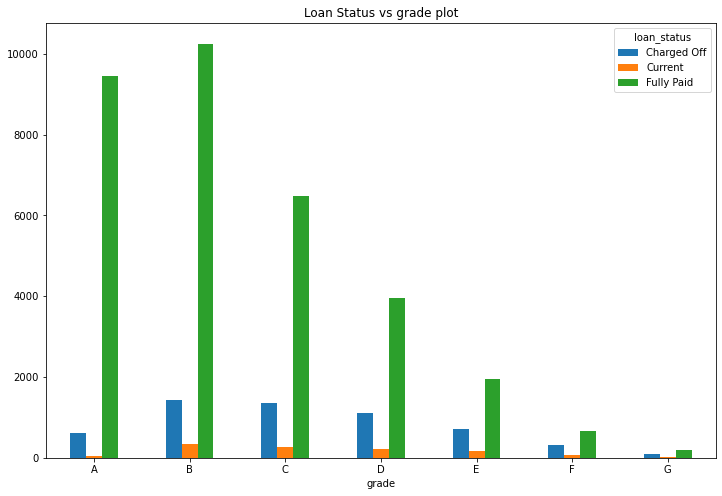

In [9]:
grf=pd.crosstab(index=loan_df['grade'],columns=loan_df['loan_status'])
print(grf)
grf.plot.bar(figsize=(12,8), rot=0)
plt.title("Loan Status vs grade plot")


# based on our observation most of the loans are grade B loans and we are hving minimum number of grade G loans. 
#Highest number of customers are in grade A and B.
# Loan Charged off is Maximum B grade and Minimum for G grade
# Majority of the loan with loan status Current is grade B and Minimum for grade G.
# Majority of the loans are fully paid. For B grade customers fully paid loan is maximum.

loan_status  Charged Off  Current  Fully Paid
term                                         
 36                 3073        0       25214
 60                 2326     1098        6931


Text(0.5, 1.0, 'Loan Status vs Term plot')

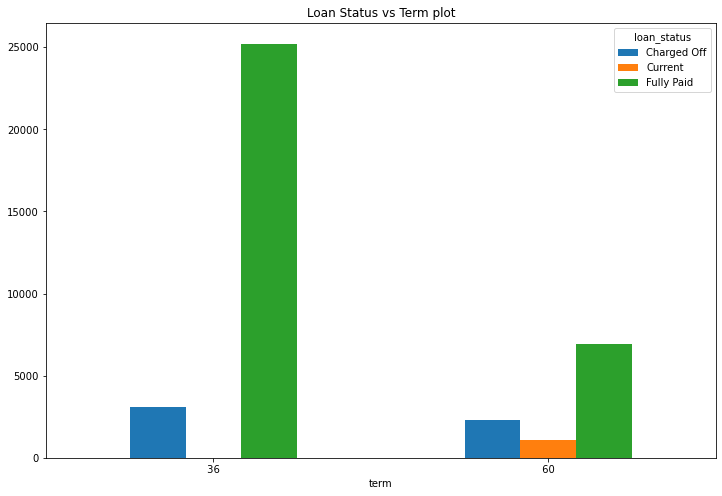

In [25]:
grf=pd.crosstab(index=loan_df['term'],columns=loan_df['loan_status'])
print(grf)
grf.plot.bar(figsize=(12,8), rot=0)
plt.title("Loan Status vs Term plot")

# Maximum of the loan charged off is seen for 36 months tenure and for loan with 60 months tenure charged off percentage
# is comparatively low.
# We don't have any current loan running for 36 months tenure. 
# Around 1098 current loans are running with 60 months loan payment tenure.  
# For 36 months tenure fully paid loan status is comparatively higher.

loan_status          Charged Off  Current  Fully Paid
verification_status                                  
Not Verified                2049      220       14229
Source Verified             1396      297        8098
Verified                    1954      581        9818


Text(0.5, 1.0, 'Loan Status vs Verification_status plot')

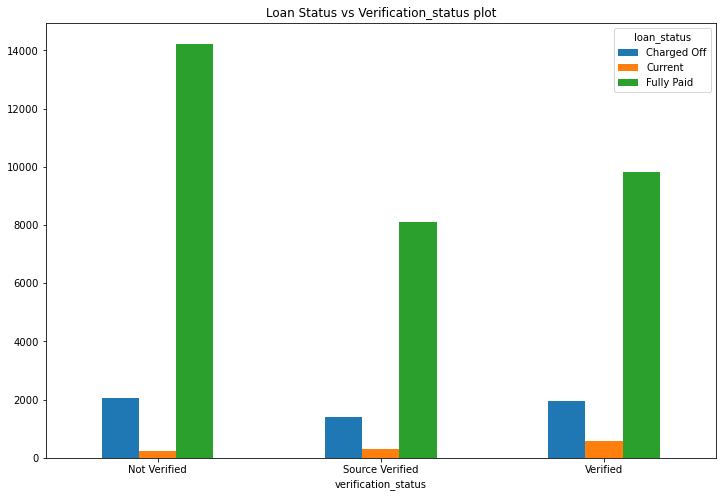

In [26]:
grf=pd.crosstab(index=loan_df['verification_status'],columns=loan_df['loan_status'])
print(grf)
grf.plot.bar(figsize=(12,8), rot=0)
plt.title("Loan Status vs Verification_status plot")

#1.Majority of the loans which are charged off, for them the verification status was not verified. In other words the loans for 
# which verifications were not done by the bank authority had the higher tendency to become bad loan and thus charged off.
#2. Majority of the loans which are currently running for them verifications were properly done. 
# Fully Paid: Max loans are not verified. 

# Q11. Using a user defined function convert the ‘emp_len’ column into categorical column as follows -

If emp_len is less than equals to 1 then recode as ‘fresher’.
If emp_len is greater than 1 and less than 3 then recode as ‘junior’.
If emp_len is greater than 3 and less than 7 then recode as ‘senior’
If emp_len is greater than 7 then recode as ‘expert’.

In [27]:

loan_df.head(2)   # Before change.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,risky_loan_applicant
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,10,...,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,1,...,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,0


In [1]:
import numpy as np
import pandas as pd
loan_df = pd.read_csv('D:\\great learnings\\NPV_project\\Project 1\\loan.csv')
loan_df.emp_length=loan_df.emp_length.fillna(0)


def emp_len_check(n):                               # Using emp_len_check method we have converted emp_length column to a 
    n = str(n).replace(" ","")  # 1year                   # categorical column.
    val =""
    for i in n:
        if i.isdigit():
            val = val + i  #10

    if str(n).find("<") != -1:
        val = 0

    num = int(val)
    if num <= 1:
        return "fresher"
    elif num > 1 and num <= 3:
        return "junior"
    elif num > 3 and num <= 7:
        return "senior"
    elif num > 7:
        return "expert"

    
    
# x = list()
for i, j in loan_df.emp_length.iteritems():
    # x.append(emp_len_check(j))
    #loan_df.emp_length.iloc() = emp_len_check(j)
    loan_df.loc[i, 'emp_length'] = emp_len_check(j)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,expert,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,fresher,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,expert,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,expert,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,fresher,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN


# Q12.Find the sum of ‘loan_amnt’ for each grade and display the distribution of ‘loan_amnt’ using a pie plot.

In [29]:
v =loan_df.groupby('grade').loan_amnt.sum()
v.sort_values(ascending = False)
#Total loan amount disbursed for each category is shown below. 

grade
B    133651350
C     89115825
A     86982400
D     65160400
E     45037900
F     19263100
G      6391675
Name: loan_amnt, dtype: int64

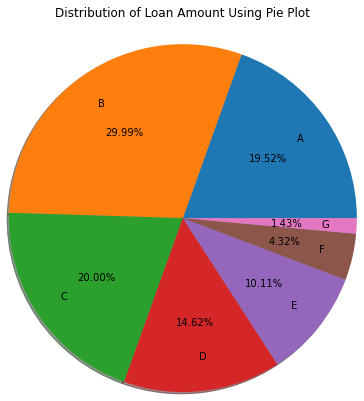

In [52]:

plt.pie(v, data= loan_df, radius = 2, labels=['A','B','C','D','E','F','G'], autopct='%0.2f%%', shadow = True,labeldistance=0.8)
plt.title("Distribution of Loan Amount Using Pie Plot",y=1.4)
plt.show()

# Maximum loan amount disbursed to grade B customers(29.98%).
# Minimum loan amount disbursed to grade G customers(1.46%).